In [2]:
import sys
sys.path.append('..')
from infmidi import Note, Clip, Track, Midi
from infmidi import chord, sheet
from infmidi.effect.rhythm import delay
from infmidi.utils import plot
from infmidi import FluidSynth
from infmidi import Controller
from infmidi.core import item2midi

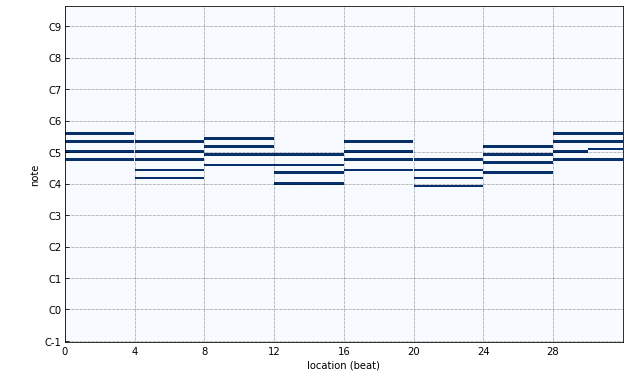

In [4]:
from infmidi import sheet, plot
txt = '''
    A4:m7 | D4:m9   | G4:7 | C4:M7     |
    F4:M7 | B3:m7-5 | E4:7 | A4:m7 A4:7
'''

progression = sheet(txt)
plot(progression)

In [11]:
synth = FluidSynth()

In [23]:
synth((clip^0.2)@9)

FluidSynth runtime version 2.2.8
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.



In [7]:
from infmidi.utils import plot_midi

In [2]:
mid = Midi([
    Track([chord('C4:m7')** 100], name='HAHA'),
    # Track([chord('A4:m7')**4]),
    # Track([chord('F4:M7')>>4]),
    # Track([chord('G4:7')]),
])

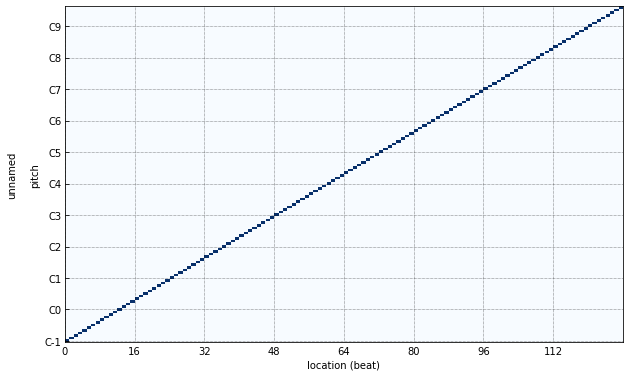

In [20]:
clip = Clip()
for i in range(128):
    clip.add(Note(i)>>i)
plot(clip)

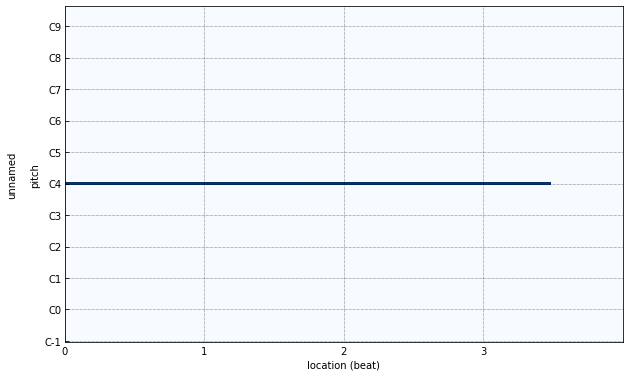

In [5]:
plot(item2midi(Clip([Note('C4')*3.5])))

In [6]:
from pretty_midi.utilities import note_name_to_number, note_number_to_drum_name

In [4]:
import pypianoroll

In [5]:
note_name_to_number('C9')

120

In [6]:
note_number_to_drum_name(77)

'Low Wood Block'

In [7]:
Note('C4')

Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.00, channel=0)

In [8]:
Controller.get_device_names()

['IAC Driver Bus 1', 'IAC Driver Bus 1']

In [9]:
synth = FluidSynth()
ctl = Controller('IAC Driver Bus 1', 'rtmidi/MACOSX_CORE')

In [1]:
txt = '''
    o x o x | o o x x
'''
drum = sheet(txt)
# synth(drum@9 + 12)

NameError: name 'sheet' is not defined

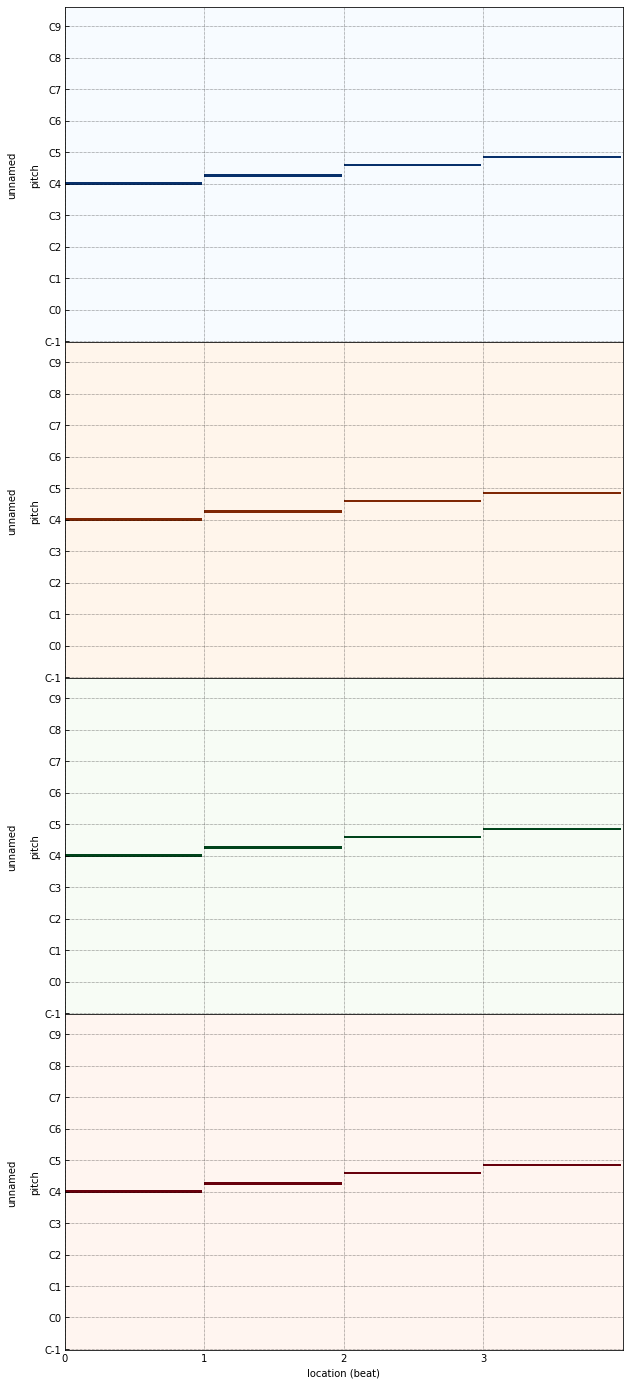

In [6]:
plot(Midi([Track(chord('C4:m7', gap=1))] * 4))

In [2]:
clip = Clip()
for i in range(0, 127):
    clip +=  (Note(i) @ 9) >> (i - 40)

NameError: name 'Clip' is not defined

In [3]:
plot(Clip([Note('C9'), Note('C-1')>>1]), ytick='pitch')

NameError: name 'plot' is not defined

In [24]:
clip.msgs

[Message('note_on', channel=9, note=40, velocity=127, time=0),
 Message('note_off', channel=9, note=40, velocity=0, time=480),
 Message('note_on', channel=9, note=41, velocity=127, time=0),
 Message('note_off', channel=9, note=41, velocity=0, time=480),
 Message('note_on', channel=9, note=42, velocity=127, time=0),
 Message('note_off', channel=9, note=42, velocity=0, time=480),
 Message('note_on', channel=9, note=43, velocity=127, time=0),
 Message('note_off', channel=9, note=43, velocity=0, time=480),
 Message('note_on', channel=9, note=44, velocity=127, time=0),
 Message('note_off', channel=9, note=44, velocity=0, time=480),
 Message('note_on', channel=9, note=45, velocity=127, time=0),
 Message('note_off', channel=9, note=45, velocity=0, time=480),
 Message('note_on', channel=9, note=46, velocity=127, time=0),
 Message('note_off', channel=9, note=46, velocity=0, time=480),
 Message('note_on', channel=9, note=47, velocity=127, time=0),
 Message('note_off', channel=9, note=47, velocit

In [25]:
plot(clip)

ValueError: data byte must be in range 0..127

In [61]:
synth(clip^0.2, channel=9)

FluidSynth runtime version 2.2.8
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.



In [13]:
txt = '''
    (C5 -)  (-  B4)  (A4 G4)  (- F4) | (-  -)  (- G4)  (A4 C5)  (- B4) | 
     -      (-  A4)  (G4 F4)  (- E4) |  -               0              | 
    (A4 -)  (-  G4)  (F4 E4)  (- D4) |  -      (- E4)  (F4  A4)  -     |
     G#4    (F4 E4)  (-  D4)  (- C4) |  -       -       -        C#4   
'''

melody = sheet(txt)

delayed_melody = delay(melody, n=4, length=0.5, decay=0.77)
bass_melody = melody - 24

mixed_melody = delayed_melody + bass_melody

In [14]:
mid = item2midi(Note('E4')).to_mido()

In [15]:
from infmidi import NoteOn

In [22]:
vars(Clip([NoteOn('E4')]).msgs[0])

{'type': 'note_on', 'time': 0, 'channel': 0, 'note': 64, 'velocity': 127}

In [25]:
vars(mid.tracks[1][2])

{'type': 'note_on', 'time': 0, 'channel': 0, 'note': 64, 'velocity': 127}

In [30]:
synth(mixed_melody@9, instrument=40)

FluidSynth runtime version 2.2.8
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.



In [63]:
clip = Clip([Note('C4'), Note('E4') >> 1, Note('G4') >> 2])

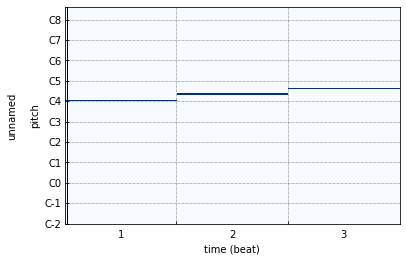

In [4]:
plot(clip)

In [6]:
plot(clip << 2)

IndexError: index -2 is out of bounds for axis 0 with size 1

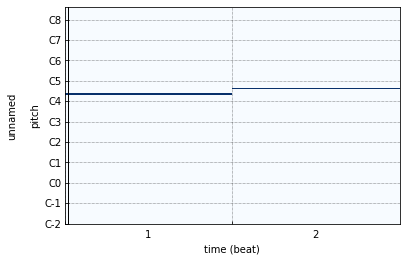

In [7]:
plot(clip << 1)

In [3]:
clip = chord('C4:M7') | chord('A4:m7') | chord('F4:M7') | chord('G4:7')

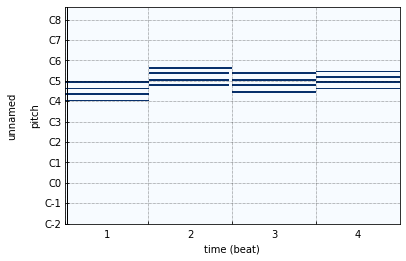

In [5]:
plot(Clip().extend([chord('C4:M7'), chord('A4:m7'), chord('F4:M7'), chord('G4:7')]))

In [8]:
clip.notes

NoteSet([
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.00, channel=0),
  Note(name="E4", value=64, freq=329.63, velocity=127, length=1.00, location=1.00, channel=0),
  Note(name="G4", value=67, freq=392.00, velocity=127, length=1.00, location=2.00, channel=0)
])

In [10]:
clip += Note("G4") >> 2.5

In [12]:
clip.notes

NoteSet([
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.00, channel=0),
  Note(name="E4", value=64, freq=329.63, velocity=127, length=1.00, location=1.00, channel=0),
  Note(name="G4", value=67, freq=392.00, velocity=127, length=1.00, location=2.00, channel=0),
  Note(name="G4", value=67, freq=392.00, velocity=127, length=1.00, location=2.50, channel=0)
])

In [9]:
clip.events

EventSet()

In [16]:
from infmidi import NoteSet

In [29]:
ns = NoteSet()

In [30]:
ns.add(Note('C4'))
ns

NoteSet([Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.00, channel=0)])

In [31]:
ns.add(Note('A4', velocity=66, location=5, channel=6))
ns

NoteSet([
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.00, channel=0),
  Note(name="A4", value=69, freq=440.00, velocity=66, length=1.00, location=5.00, channel=6)
])

In [32]:
ns.add(Note('A4', velocity=77, length=3., location=5, channel=6))
ns

NoteSet([
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.00, channel=0),
  Note(name="A4", value=69, freq=440.00, velocity=77, length=3.00, location=5.00, channel=6)
])

In [9]:
ns.mat[0][67]

_FixedNoteSet([Note(name="G4", value=67, freq=392.00, velocity=127, length=0.50, location=0.00, channel=0), Note(name="G4", value=67, freq=392.00, velocity=127, length=1.00, location=0.50, channel=0)])

In [33]:
ns.add(Note('C4', location=0.5))

In [34]:
jns

NoteSet([
  Note(name="C4", value=60, freq=261.63, velocity=127, length=0.50, location=0.00, channel=0),
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=0.50, channel=0),
  Note(name="A4", value=69, freq=440.00, velocity=77, length=3.00, location=5.00, channel=6)
])

In [6]:
clip = Clip([Note('G3'), Note('C4') >> 1, Note('B3') >> 2, Note('C4') >> 3])

In [7]:
clip.notes

NoteSet([
  Note(name="G3", value=55, freq=196.00, velocity=127, length=1.00, location=0.00, channel=0),
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=1.00, channel=0),
  Note(name="B3", value=59, freq=246.94, velocity=127, length=1.00, location=2.00, channel=0),
  Note(name="C4", value=60, freq=261.63, velocity=127, length=1.00, location=3.00, channel=0)
])

In [24]:
from infmidi import FluidSynth, plot

ImportError: cannot import name 'plot' from 'infmidi' (/Users/yibei/Project/infmidi/examples/../infmidi/__init__.py)

In [25]:
from infmidi.utils import plot

In [26]:
synth = FluidSynth()

In [23]:
synth((clip**4)^0.5)

FluidSynth runtime version 2.2.8
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.



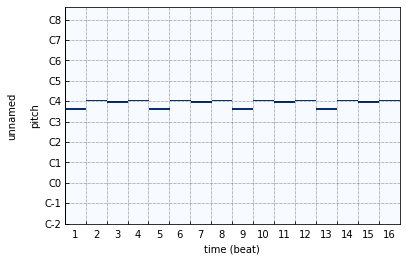

In [57]:
plot(clip ** 4)

In [56]:
synth(((clip**10) ^ 0.3) @ 9)

FluidSynth runtime version 2.2.8
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.



In [8]:
ctl(Note('C4'))

TypeError: item2midi() takes 1 positional argument but 2 were given